# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#API Key : 30ffdc52a13bb36deb117bfe31c74c7c
print(api_key)

30ffdc52a13bb36deb117bfe31c74c7c


In [10]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
count=0
latlist=list()
longlist=list()

for k in range(-180,181,20):
    longlist.append(k)

#list of cities
cityset=set()

#list of countries corresponding to the city.
country_list=list()
#create list of longitudes for use as a random choice

for i in range(-90,90,+2):
#use latitude choice from -90 to +90 and get a city closest to that latitude.
    for j in longlist:
        latitude=i
        longitude=j
        city = citipy.nearest_city(latitude, longitude)
        cityset.add(city.city_name)
        country_list.append(city.country_code)
print(str(len(cityset)))
print(str(len(country_list)))


555
1710


In [11]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=30ffdc52a13bb36deb117bfe31c74c7c&units=metric&q=


In [12]:
# Get current weather for all the cities using openweathermapy. 

#initialize count variables. 
countcity=0
countfail=0
     
# set up lists to hold reponse info
citylist=list()
cloudiness=list()
temp = list()
countrycode=list()
date=list()
humidity=list()
latitude = list()
longitude=list()
tempmax=list()
windspeed=list()

# Loop through the list of cities and perform a request for weather data on each city.store results in lists. 
for city in cityset:
    #print(str(city))
    countcity=countcity+1
    print("Retrieving  data for record " + str(countcity) + " " + city)
    try:
        weatherdetails = requests.get(query_url + city).json()
        #pprint(weatherdetails)
        citylist.append (weatherdetails["name"])
        cloudiness.append (weatherdetails["clouds"]["all"])
        countrycode.append (weatherdetails["sys"]["country"])
        #datetime=weatherdetails["dt"]
        date.append (weatherdetails["dt"])
        humidity.append (weatherdetails["main"]["humidity"])
        latitude.append (weatherdetails["coord"]["lat"])
        longitude.append (weatherdetails["coord"]["lon"])
        tempmax.append (weatherdetails["main"]["temp_max"])
        windspeed.append (weatherdetails["wind"]["speed"])
    except:
        countfail +=1
        print("Error in getting data for city " + city)
        print("error code: " + weatherdetails["cod"])
        print("message: " + weatherdetails["message"])

pprint(weatherdetails)        
print("Data Retrieval Complete....")
print("---------------------------------------------------------")
print("Number of cities weather data  not found: " + str(countfail))

Retrieving  data for record 1 ostrovnoy
Retrieving  data for record 2 boa vista
Retrieving  data for record 3 pavilosta
Retrieving  data for record 4 boende
Retrieving  data for record 5 shache
Retrieving  data for record 6 clyde river
Retrieving  data for record 7 sawtell
Retrieving  data for record 8 port hueneme
Retrieving  data for record 9 milkovo
Retrieving  data for record 10 pangnirtung
Retrieving  data for record 11 bartica
Retrieving  data for record 12 guarare
Retrieving  data for record 13 mataura
Retrieving  data for record 14 vilhena
Retrieving  data for record 15 attawapiskat
Error in getting data for city attawapiskat
error code: 404
message: city not found
Retrieving  data for record 16 busselton
Retrieving  data for record 17 ushuaia
Retrieving  data for record 18 salalah
Retrieving  data for record 19 chicama
Retrieving  data for record 20 longkou
Retrieving  data for record 21 constitucion
Retrieving  data for record 22 abomsa
Error in getting data for city abomsa
e

Retrieving  data for record 171 hvolsvollur
Error in getting data for city hvolsvollur
error code: 404
message: city not found
Retrieving  data for record 172 umm lajj
Retrieving  data for record 173 high point
Retrieving  data for record 174 palana
Retrieving  data for record 175 hasaki
Retrieving  data for record 176 upernavik
Retrieving  data for record 177 la palma
Retrieving  data for record 178 pandan niog
Retrieving  data for record 179 morag
Retrieving  data for record 180 avenal
Retrieving  data for record 181 barrow
Retrieving  data for record 182 resistencia
Retrieving  data for record 183 asau
Error in getting data for city asau
error code: 404
message: city not found
Retrieving  data for record 184 san pedro
Retrieving  data for record 185 the valley
Retrieving  data for record 186 veinticinco de mayo
Retrieving  data for record 187 uniontown
Retrieving  data for record 188 fort nelson
Retrieving  data for record 189 porto novo
Retrieving  data for record 190 russell
Retri

Retrieving  data for record 345 poum
Retrieving  data for record 346 nayudupeta
Retrieving  data for record 347 yunjinghong
Error in getting data for city yunjinghong
error code: 404
message: city not found
Retrieving  data for record 348 leh
Retrieving  data for record 349 devils lake
Retrieving  data for record 350 matranovak
Retrieving  data for record 351 padang
Retrieving  data for record 352 mabaruma
Retrieving  data for record 353 makakilo city
Retrieving  data for record 354 mnogovershinnyy
Retrieving  data for record 355 abu kamal
Retrieving  data for record 356 rantauprapat
Retrieving  data for record 357 tuktoyaktuk
Retrieving  data for record 358 rongcheng
Retrieving  data for record 359 tazovskiy
Retrieving  data for record 360 gangotri
Error in getting data for city gangotri
error code: 404
message: city not found
Retrieving  data for record 361 chiang rai
Retrieving  data for record 362 kodinsk
Retrieving  data for record 363 galle
Retrieving  data for record 364 sidi al

Retrieving  data for record 509 verkhnevilyuysk
Retrieving  data for record 510 roald
Retrieving  data for record 511 sinait
Retrieving  data for record 512 robertson
Retrieving  data for record 513 palabuhanratu
Error in getting data for city palabuhanratu
error code: 404
message: city not found
Retrieving  data for record 514 skelleftea
Retrieving  data for record 515 pondicherry
Retrieving  data for record 516 calvinia
Retrieving  data for record 517 taixing
Retrieving  data for record 518 ginda
Retrieving  data for record 519 kamiiso
Retrieving  data for record 520 ormond beach
Retrieving  data for record 521 mangit
Retrieving  data for record 522 kapaa
Retrieving  data for record 523 castro
Retrieving  data for record 524 avarua
Retrieving  data for record 525 hualmay
Retrieving  data for record 526 thompson
Retrieving  data for record 527 moose factory
Retrieving  data for record 528 ribeira grande
Retrieving  data for record 529 maarianhamina
Error in getting data for city maari

In [13]:
print(len(citylist))
print(len(cloudiness))
print(len(tempmax))
print(len(humidity))
print(len(latitude))

503
503
503
503
503


In [14]:
weatherdict=dict()
weatherdict={"City":citylist,"Cloudiness":cloudiness,"Country_code":countrycode,"Date":date,
             "Humidity":humidity,"Latitude":latitude,"Longitude":longitude,"Max_temp":tempmax,
             "Wind_speed":windspeed}
#print(len(weatherdict))
weather_df = pd.DataFrame(weatherdict)
weather_df.tail(10)

,City,Cloudiness,Country_code,Date,Humidity,Latitude,Longitude,Max_temp,Wind_speed
493,Georgetown,76,GY,1553611675,63,6.80,-58.16,29.12,3.47
494,Chase,1,US,1553611740,38,43.89,-85.64,3.33,1.72
495,Polunochnoye,24,RU,1553611771,74,60.87,60.43,0.97,6.12
496,Goderich,0,CA,1553611733,84,43.74,-81.71,0.56,1.97
497,Ponta do Sol,32,BR,1553611772,67,-20.63,-46.00,28.22,2.57
498,Iranshahr,48,IR,1553608800,19,27.21,60.69,30.00,6.20
499,Port-Gentil,40,GA,1553608800,74,-0.72,8.78,31.00,6.20
500,Kieta,76,PG,1553611773,100,-6.22,155.63,25.82,0.92
501,Mul,0,IN,1553611773,65,20.07,79.68,26.97,1.47
502,Kpandae,0,GH,1553611773,46,8.46,-0.01,36.52,3.07


In [15]:
#Save weather data in a csv file for future reference and use. 
weather_df.to_csv("weatherdata.csv",index=False,header=True)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
City            503 non-null object
Cloudiness      503 non-null int64
Country_code    503 non-null object
Date            503 non-null int64
Humidity        503 non-null int64
Latitude        503 non-null float64
Longitude       503 non-null float64
Max_temp        503 non-null float64
Wind_speed      503 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 35.4+ KB


In [17]:
#Import dependencies for plotting.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
x_axis=weather_df["Latitude"]
y_axis_maxtemp=weather_df["Max_temp"]
y_axis_humidity=weather_df["Humidity"]
y_axis_cloudiness = weather_df["Cloudiness"]
y_axis_Windspeed = weather_df["Wind_speed"]

In [18]:
#Review cities that have temperature greater than 28 deg C.
weather_df.loc[weather_df["Max_temp"] >= 38]


,City,Cloudiness,Country_code,Date,Humidity,Latitude,Longitude,Max_temp,Wind_speed
100,Oum Hadjer,12,TD,1553611644,24,13.30,19.70,38.87,3.92
220,Am Timan,32,TD,1553611688,21,11.04,20.28,38.82,1.77
290,Yendi,20,GH,1553611708,32,9.45,0.00,38.97,2.07
300,Dori,8,BF,1553611711,21,14.03,-0.03,38.37,3.47
373,Wajir,40,KE,1553608800,27,1.75,40.07,39.00,5.10
485,Gao,8,ML,1553611766,13,16.28,-0.04,39.22,7.42


C:\Users\JAG\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Maximum Temp in C')

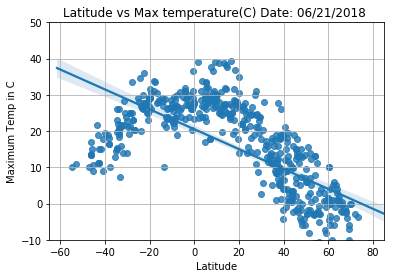

In [19]:
sns.regplot(x_axis, y_axis_maxtemp, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label="Latitude vs Max temperature(C)", 
            color=None,marker='o', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Max temperature(C) Date: 06/21/2018 ")
plt.grid()
plt.xlim(-65,85)
plt.ylim(-10,50)
plt.ylabel("Maximum Temp in C")

In [20]:
plt.savefig("Latitude vs MaxTemp.png")

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Humidity %')

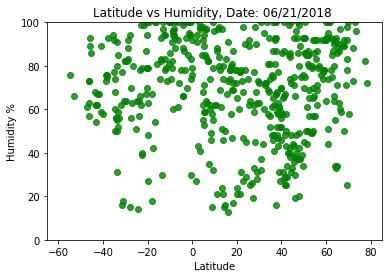

In [21]:
#Plot of latitude vs Humidity
sns.regplot(x_axis, y_axis_humidity, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=False, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color="g", 
            marker='o', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Humidity, Date: 06/21/2018 ")
plt.xlim(-65,85)
plt.ylim(-0,100)
plt.ylabel("Humidity %")

In [22]:
plt.savefig("Latitude vs Humidity.png")

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Cloudiness')

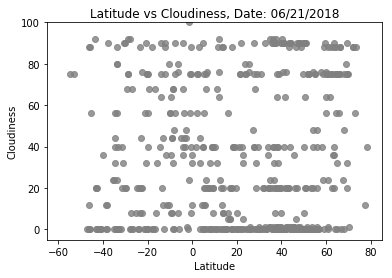

In [23]:
#Plot of latitude vs Cloudiness
sns.regplot(x_axis, y_axis_cloudiness, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=False, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color="grey", 
            marker='o', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Cloudiness, Date: 06/21/2018")
plt.xlim(-65,85)
plt.ylim(-5,100)
plt.ylabel("Cloudiness")

In [24]:
plt.savefig("Latitude vs Cloudiness.png")

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Wind Speed (km/hr)')

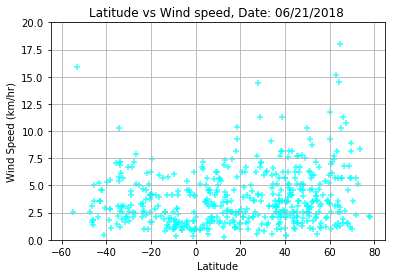

In [25]:
#Latitude vs windspeed
sns.regplot(x_axis, y_axis_Windspeed, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=False, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color="cyan", 
            marker='+', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Wind speed, Date: 06/21/2018 ")
plt.grid()
plt.xlim(-65,85)
plt.ylim(-0,20)
plt.ylabel("Wind Speed (km/hr)")

In [26]:
plt.savefig("Latitude vs Windspeed.png")

<Figure size 432x288 with 0 Axes>